In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from hmmlearn import hmm
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools


In [2]:
data = pd.read_csv('data/train.csv')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


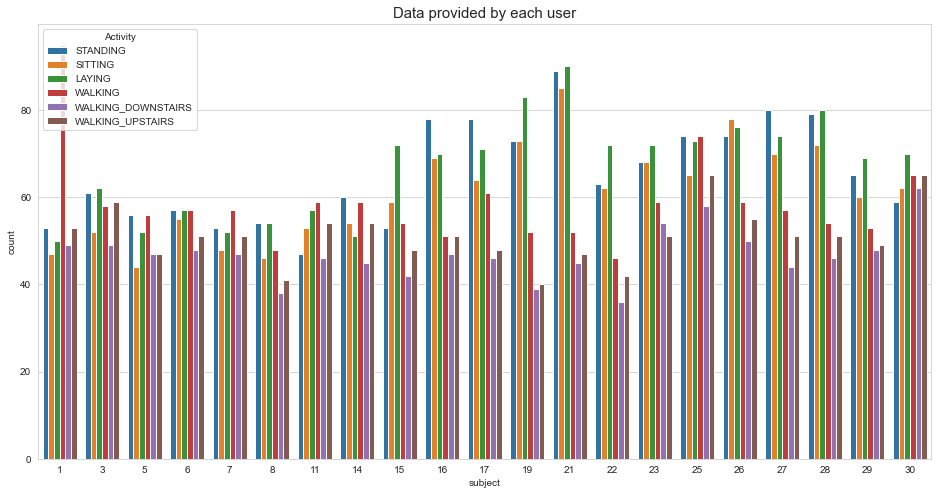

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=15)
sns.countplot(x='subject',hue='Activity', data=data)
plt.show()

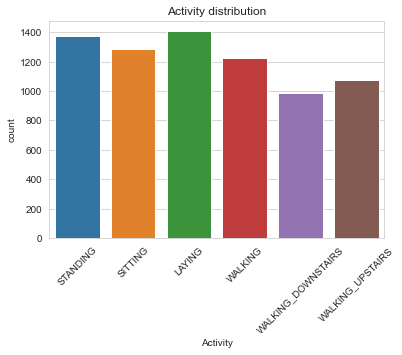

In [4]:
plt.title('Activity distribution')
sns.countplot(data=data, x='Activity')
plt.xticks(rotation=45)
plt.show()


c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seabo

[]

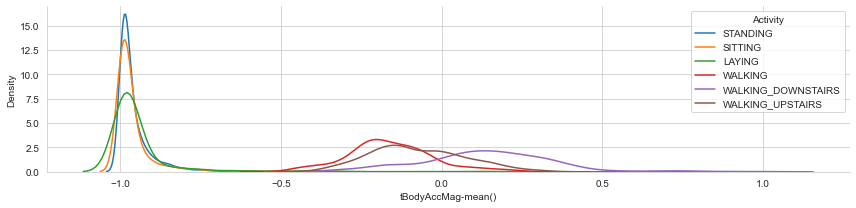

In [5]:
facetgrid = sns.FacetGrid(data, hue='Activity', aspect=4, legend_out=False)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()
plt.plot()

In [6]:
# each subject is continuous and does different activities. That's considered a sequence
groups = [group.iloc[:, :-2].values for n, group in data.groupby('subject')]

In [7]:
# example library, can use any
# learn from multiple sequences
concatenated = np.concatenate(groups)
length = [len(group) for group in groups]
# First try GaussianHMM, GMMHMM is gaussian mixture model, more flexible but prone to overfit
gauss_hmm = hmm.GaussianHMM(n_components=6, covariance_type='spherical', random_state=42)
gauss_hmm.fit(concatenated, length)

GaussianHMM(covariance_type='spherical', n_components=6, random_state=42)

In [8]:
# The prediction gives a list of number, same as the length of sequence
# The numbers might not mean anything specific, but you can map it to the "labels"
# HMM is sort of unsupervised, so no labels when training
# Each user is a sequence
gauss_hmm.predict(groups[0])

array([1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 5, 5, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 5, 3, 3, 5, 5, 3, 3, 0, 3, 3, 5, 3,

## Dataset

The dataset contains 6 activities:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING


In [9]:
# Setting up mappings from state to activity
classes = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
permutations = itertools.permutations(range(len(classes)))

# Create a list of mappings
mappings = [{perm[i]: classes[i] for i in range(len(classes))} for perm in permutations]

In [10]:
# finding accuracies

# Finds best mapping (highest accuracy) out of all possible permutations of mappings
subjects = data['subject'].unique()
pred_accs = []
best_mapping = {}
for activity_labels in mappings:
    temp_accs = []
    for i in range(len(groups)):
        pred = gauss_hmm.predict(groups[i])
        pred_act = [activity_labels[state] for state in pred]
        true = data[data['subject'] == subjects[i]]['Activity'].values
        temp_accs.append(accuracy_score(true, pred_act))
    if pred_accs == []:
        pred_accs = temp_accs
    elif sum(temp_accs) / len(temp_accs) > sum(pred_accs) / len(pred_accs):
        pred_accs = temp_accs
        best_mapping = activity_labels

In [11]:
print(best_mapping)

{3: 'WALKING', 0: 'WALKING_UPSTAIRS', 5: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 1: 'STANDING', 2: 'LAYING'}


In [12]:
print(pred_accs)

[0.6282420749279539, 0.6510263929618768, 0.5066225165562914, 0.5692307692307692, 0.5844155844155844, 0.5587188612099644, 0.43037974683544306, 0.4551083591331269, 0.5670731707317073, 0.4918032786885246, 0.4673913043478261, 0.5083333333333333, 0.6642156862745098, 0.5077881619937694, 0.6236559139784946, 0.36674816625916873, 0.5153061224489796, 0.5797872340425532, 0.5418848167539267, 0.6133720930232558, 0.5848563968668408]


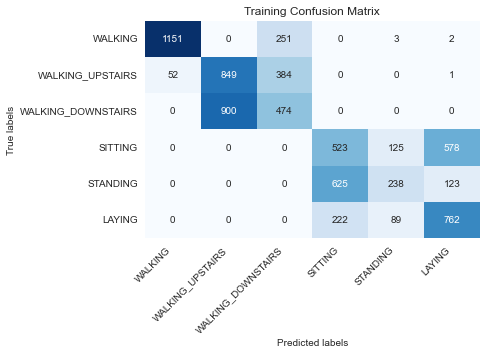

In [13]:
# Creating a confusion matrix based on the best mapping for all subjects
total_cm = np.zeros((6, 6), dtype=int)

for i in range(len(groups)):
    pred = gauss_hmm.predict(groups[i])
    pred_act = [best_mapping[state] for state in pred]
    true = data[data['subject'] == subjects[i]]['Activity'].values
    cm = confusion_matrix(true, pred_act)
    total_cm += cm

fig,ax = plt.subplots()
sns.heatmap(total_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training Confusion Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [14]:
test = pd.read_csv('data/test.csv')

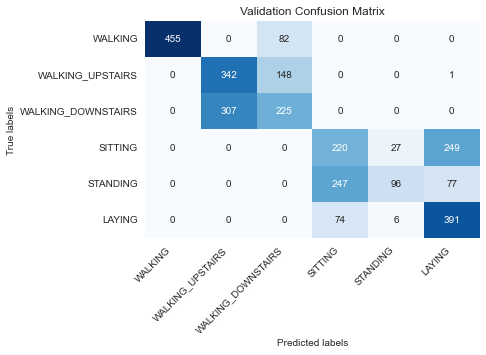

In [15]:
subjects_test = test['subject'].unique()
# Creating a confusion matrix based on the best mapping for all subjects
total_cm = np.zeros((6, 6), dtype=int)
test_groups = [group.iloc[:, :-2].values for n, group in test.groupby('subject')]

for i in range(len(test_groups)):
    pred = gauss_hmm.predict(test_groups[i])
    pred_act = [best_mapping[state] for state in pred]
    true = test[test['subject'] == subjects_test[i]]['Activity'].values
    cm = confusion_matrix(true, pred_act)
    total_cm += cm

fig,ax = plt.subplots()
sns.heatmap(total_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Validation Confusion Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()